# Problem Statement:

### Five million Americans are currently living with heart diseases, and the numbers are expected to rise. it is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals. in-order to understand the reasons of the Heart-attack, a data was collected from various hospitals across US which is given in US_Heart_Patients.csv. In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not. Perform EDA on the data and build a model which will predict whether the person will suffer from Heart-attack or not.

# Upload required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


# EDA

#### Shape

In [3]:
print("no. of rows:", df.shape[0], "\n""no. of columns :", df.shape[1])

no. of rows: 4240 
no. of columns : 16


# Data type of data features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


#### checking for Possible columns which are categorical but are not having data type "object"

In [5]:
df['education'].value_counts()

1.0    1717
2.0    1252
3.0     688
4.0     473
Name: education, dtype: int64

In [6]:
df['currentSmoker'].value_counts()

0.0    2143
1.0    2094
Name: currentSmoker, dtype: int64

In [7]:
df['BP Meds'].value_counts()

0.0    4056
1.0     124
Name: BP Meds, dtype: int64

In [8]:
df['prevalentStroke'].value_counts()

0.0    4206
1.0      25
Name: prevalentStroke, dtype: int64

In [9]:
df['prevalentHyp'].value_counts()

0.0    2922
1.0    1316
Name: prevalentHyp, dtype: int64

In [10]:
df['diabetes'].value_counts()

0.0    4129
1.0     109
Name: diabetes, dtype: int64

In [11]:
df['Heart-Att'].value_counts()

0    3596
1     644
Name: Heart-Att, dtype: int64

In [12]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

## Change the data types of these 7 features

In [13]:
cat = ['education','currentSmoker','BP Meds','prevalentStroke', 'prevalentHyp', 'diabetes' ]

In [14]:
for i in cat:
    df[i] = df[i].astype("object")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


## Making different list for categorical columns and numerical columns

In [16]:
cat = []
num = []

for i in df.columns:
    if df[i].dtype =='object':
        cat.append(i)
    else:
        num.append(i)
        
print(cat)
print("***********"*5)
print(num)

['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
*******************************************************
['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


### Describe for numerical and categorical columns

In [17]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
tot cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0
Diastolic BP,4235.0,82.901889,11.914467,48.00,75.00,82.000,90.00,142.5
BMI,4216.0,25.798916,4.075256,15.54,23.07,25.395,28.04,56.8
heartRate,4236.0,75.867800,11.999488,44.00,68.00,75.000,83.00,143.0
glucose,3849.0,81.951936,23.958428,40.00,71.00,78.000,87.00,394.0
Heart-Att,4240.0,0.151887,0.358953,0.00,0.00,0.000,0.00,1.0


In [18]:
df[cat].describe().T

,count,unique,top,freq
Gender,4232,2,Female,2414
education,4130.0,4.0,1.0,1717.0
currentSmoker,4237.0,2.0,0.0,2143.0
BP Meds,4180.0,2.0,0.0,4056.0
prevalentStroke,4231.0,2.0,0.0,4206.0
prevalentHyp,4238.0,2.0,0.0,2922.0
diabetes,4238.0,2.0,0.0,4129.0


### Unique values for categorical variables

In [19]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(), ': ', df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Male      1818
Female    2414
Name: Gender, dtype: int64


EDUCATION :  4
4.0     473
3.0     688
2.0    1252
1.0    1717
Name: education, dtype: int64


CURRENTSMOKER :  2
1.0    2094
0.0    2143
Name: currentSmoker, dtype: int64


BP MEDS :  2
1.0     124
0.0    4056
Name: BP Meds, dtype: int64


PREVALENTSTROKE :  2
1.0      25
0.0    4206
Name: prevalentStroke, dtype: int64


PREVALENTHYP :  2
1.0    1316
0.0    2922
Name: prevalentHyp, dtype: int64


DIABETES :  2
1.0     109
0.0    4129
Name: diabetes, dtype: int64




### Find the entire unique values in the columns

In [20]:
for i in df.columns:
    print("***************************************************************", i, 
         "*********************************************************************")
    print()
    print(set(df[i].tolist()))
    print()

*************************************************************** Gender *********************************************************************

{nan, 'Male', 'Female'}

*************************************************************** age *********************************************************************

{nan, nan, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0}

*************************************************************** education *********************************************************************

{nan, 1.0, 2.0, 3.0, 4.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [21]:
# Are there any missing value ?
# All independent features have missing values
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [22]:
### Are there any duplicate record
### Check for duplicate data

dups = df.duplicated()
print("Number of duplicates rows = %d" % (dups.sum()))
df[dups]

Number of duplicates rows = 0


,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att


In [ ]:
"""
this is just for reference in case there is any duplicates data there
dataset = dataset.drop_duplicates(ignore_index=True)
"""

In [23]:
### Let's rename columns to remove space before we impute

df.rename(columns = {'BP Meds':'BPMeds', 'tot cholesterol':'tot_cholesterol',
                    'Systolic BP':'Systolic_BP', 'Diastolic BP':'Diastolic_BP'}, inplace=True)

In [24]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,tot_cholesterol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot_cholesterol  4180 non-null   float64
 10  Systolic_BP      4236 non-null   float64
 11  Diastolic_BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


### Imputation of all missing values with the best possible options

In [26]:
df.Gender.mode()

0    Female
Name: Gender, dtype: object

In [27]:
df.Gender = df.Gender.fillna('Female')

###### Imputing the object variables in a loop using mode method. Important to note that after imputation these variables will become numeric as the imputation values are numbers and hence the same needs to be converted in to object one more time

In [28]:
for column in ['education','currentSmoker','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [29]:
df.isnull().sum()

Gender               0
age                  2
education            0
currentSmoker        0
cigsPerDay          31
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
tot_cholesterol     60
Systolic_BP          4
Diastolic_BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4238 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   tot_cholesterol  4180 non-null   float64
 10  Systolic_BP      4236 non-null   float64
 11  Diastolic_BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [31]:
cat1 = ['education','currentSmoker','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

In [32]:
for i in cat1:
    df[i] = df[i].astype('object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4238 non-null   float64
 2   education        4240 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4240 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   tot_cholesterol  4180 non-null   float64
 10  Systolic_BP      4236 non-null   float64
 11  Diastolic_BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


In [34]:
df.isnull().sum()/len(df)*100

Gender             0.000000
age                0.047170
education          0.000000
currentSmoker      0.000000
cigsPerDay         0.731132
BPMeds             0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
tot_cholesterol    1.415094
Systolic_BP        0.094340
Diastolic_BP       0.117925
BMI                0.566038
heartRate          0.094340
glucose            9.221698
Heart-Att          0.000000
dtype: float64

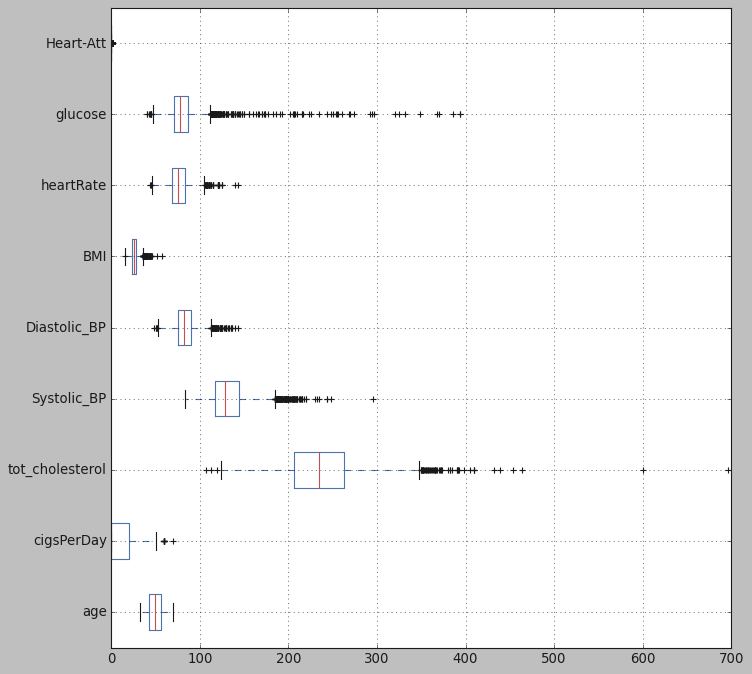

In [35]:
# Construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

##### No possible outliers are present here in "age", we will use mean to impute null values in "age" column

In [36]:
df.age = df.age.fillna(df.age.mean())

In [37]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot_cholesterol',
       'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

#### All other variables have possible outliers and hence median would be used for imputation

In [38]:
impute = ['cigsPerDay','tot_cholesterol','Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose']

In [39]:
for i in impute:
    df[i].fillna(df[i].median(), inplace=True)

In [40]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot_cholesterol    0
Systolic_BP        0
Diastolic_BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

### All null values have been appropriately imputed for building a model

#### Recheck the infor

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4240 non-null   float64
 2   education        4240 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   tot_cholesterol  4240 non-null   float64
 10  Systolic_BP      4240 non-null   float64
 11  Diastolic_BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


In [42]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(), ': ', df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Male      1818
Female    2422
Name: Gender, dtype: int64


EDUCATION :  4
4.0     473
3.0     688
2.0    1252
1.0    1827
Name: education, dtype: int64


CURRENTSMOKER :  2
1.0    2094
0.0    2146
Name: currentSmoker, dtype: int64


BPMEDS :  2
1.0     124
0.0    4116
Name: BPMeds, dtype: int64


PREVALENTSTROKE :  2
1.0      25
0.0    4215
Name: prevalentStroke, dtype: int64


PREVALENTHYP :  2
1.0    1316
0.0    2924
Name: prevalentHyp, dtype: int64


DIABETES :  2
1.0     109
0.0    4131
Name: diabetes, dtype: int64




In [43]:
cat = []
num = []

for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)
        
print(cat)
print(num)

['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot_cholesterol', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


# Univariate Analysis

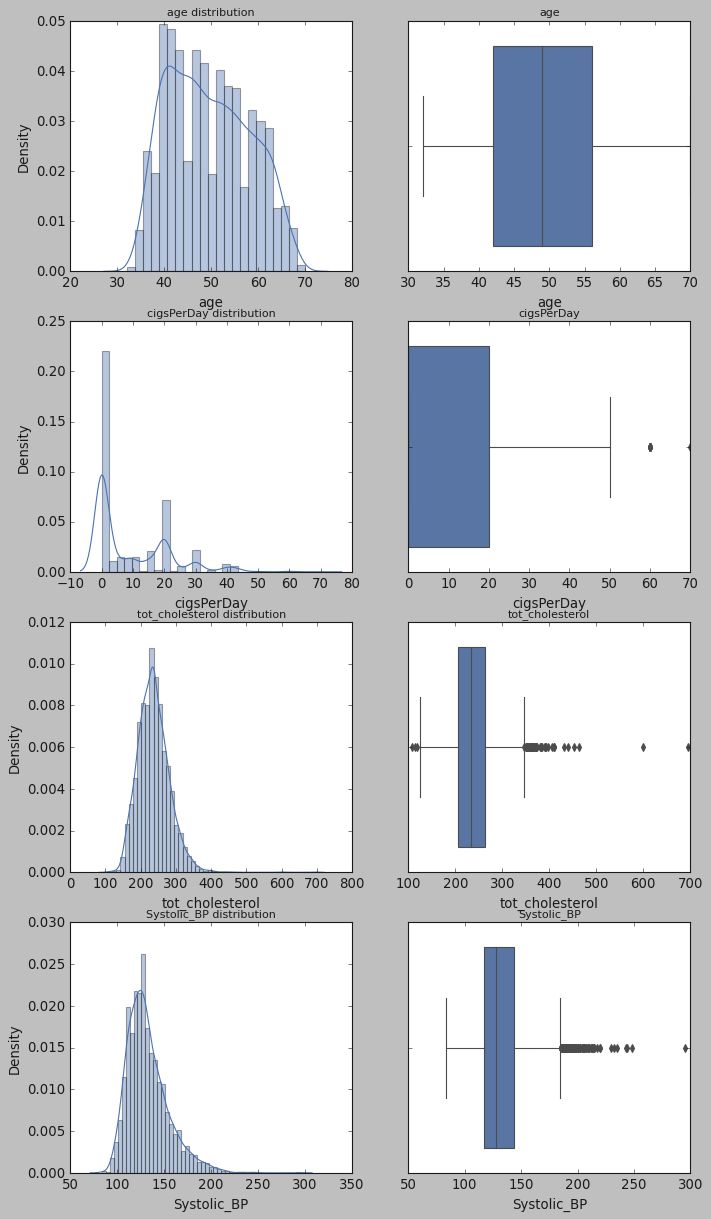

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['age'], ax = axes[0][0])
a.set_title('age distribution', fontsize=10)

a = sns.boxplot(df['age'], orient="v", ax=axes[0][1])
a.set_title("age", fontsize=10)

a = sns.distplot(df['cigsPerDay'], ax=axes[1][0])
a.set_title("cigsPerDay distribution", fontsize=10)

a = sns.boxplot(df['cigsPerDay'], orient="v", ax=axes[1][1])
a.set_title("cigsPerDay", fontsize=10)

a = sns.distplot(df['tot_cholesterol'], ax=axes[2][0])
a.set_title("tot_cholesterol distribution", fontsize=10)

a = sns.boxplot(df['tot_cholesterol'], orient="v", ax=axes[2][1])
a.set_title("tot_cholesterol", fontsize=10)

a = sns.distplot(df['Systolic_BP'], ax=axes[3][0])
a.set_title("Systolic_BP distribution", fontsize=10)

a = sns.boxplot(df['Systolic_BP'], orient='v', ax=axes[3][1])
a.set_title("Systolic_BP", fontsize=10)

plt.show()

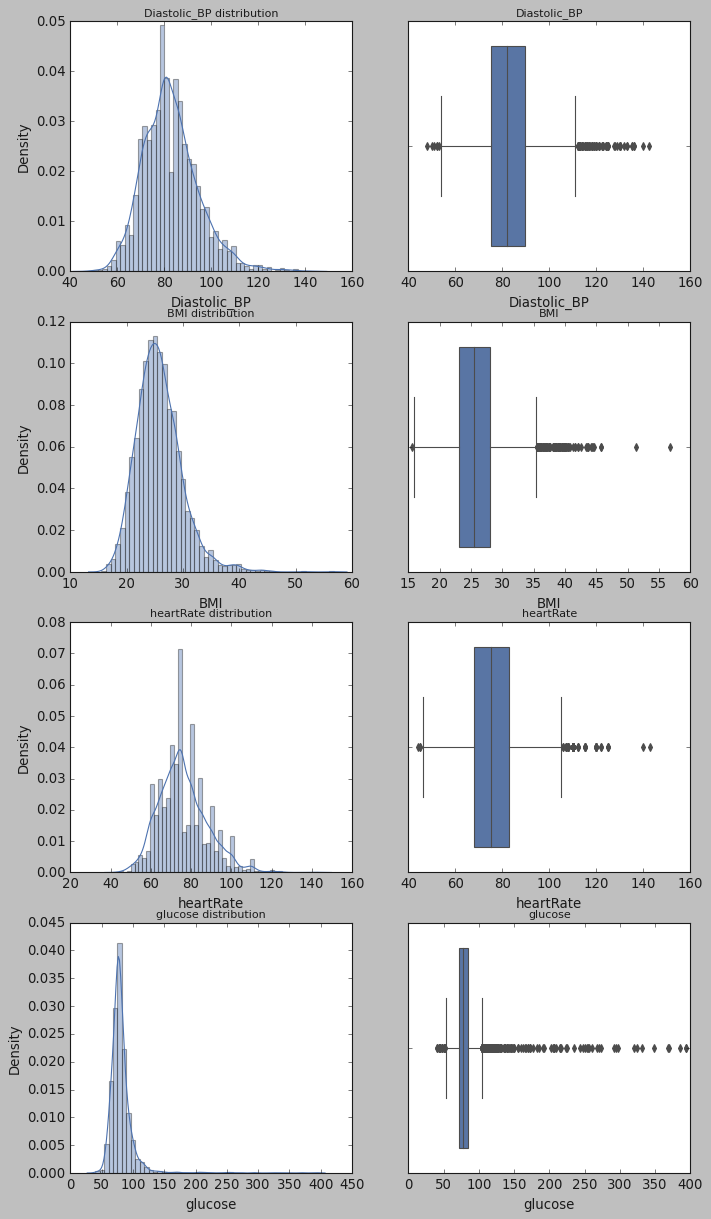

In [45]:
# 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att'
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['Diastolic_BP'], ax = axes[0][0])
a.set_title('Diastolic_BP distribution', fontsize=10)

a = sns.boxplot(df['Diastolic_BP'], orient="v", ax=axes[0][1])
a.set_title("Diastolic_BP", fontsize=10)

a = sns.distplot(df['BMI'], ax=axes[1][0])
a.set_title("BMI distribution", fontsize=10)

a = sns.boxplot(df['BMI'], orient="v", ax=axes[1][1])
a.set_title("BMI", fontsize=10)

a = sns.distplot(df['heartRate'], ax=axes[2][0])
a.set_title("heartRate distribution", fontsize=10)

a = sns.boxplot(df['heartRate'], orient="v", ax=axes[2][1])
a.set_title("heartRate", fontsize=10)

a = sns.distplot(df['glucose'], ax=axes[3][0])
a.set_title("glucose distribution", fontsize=10)

a = sns.boxplot(df['glucose'], orient='v', ax=axes[3][1])
a.set_title("glucose", fontsize=10)

plt.show()

### There are some possible outliers and the same would be treated accordingly. Skewness is not observed in the continous variables

# Bivariate and Multivariate Analysis

In [46]:
print(num)

['age', 'cigsPerDay', 'tot_cholesterol', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


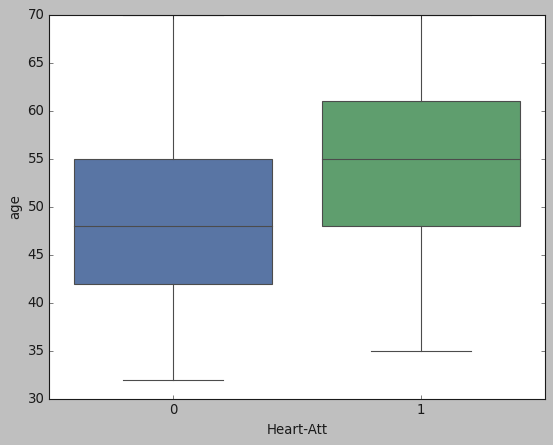

In [47]:
sns.boxplot(df['Heart-Att'], df['age'])
plt.show()

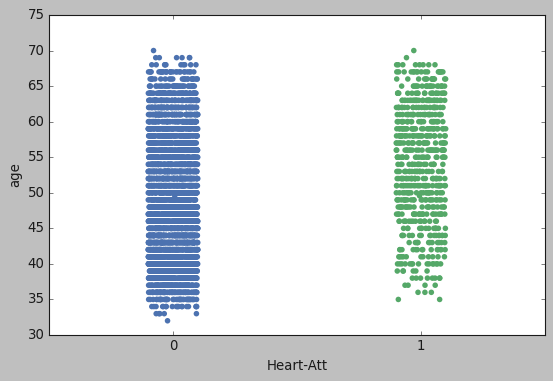

In [48]:
plt.figure(figsize=(8,5))
sns.stripplot(df['Heart-Att'], df['age'], jitter=True)
plt.show()

#### Note: Younger people have less probability of Heart Attach. This pattern is clearly visible, however probability of heart attach is low even for old age people, as per the above strip plot

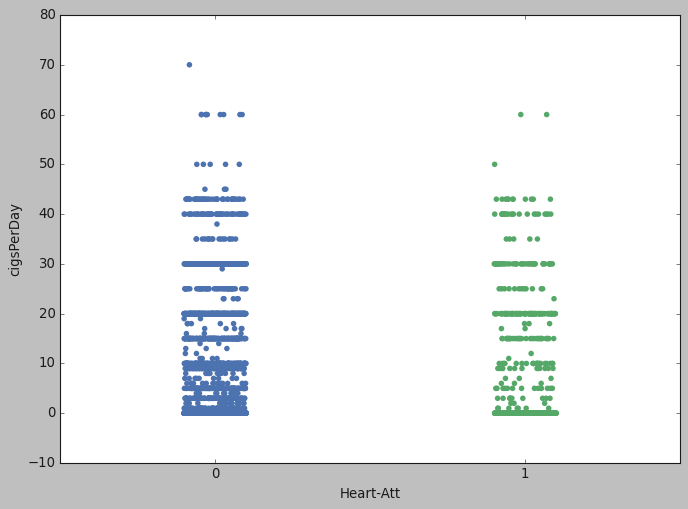

In [49]:
plt.figure(figsize=(10,7))
sns.stripplot(df['Heart-Att'], df['cigsPerDay'], jitter=True)
# Distribution of values
plt.show()

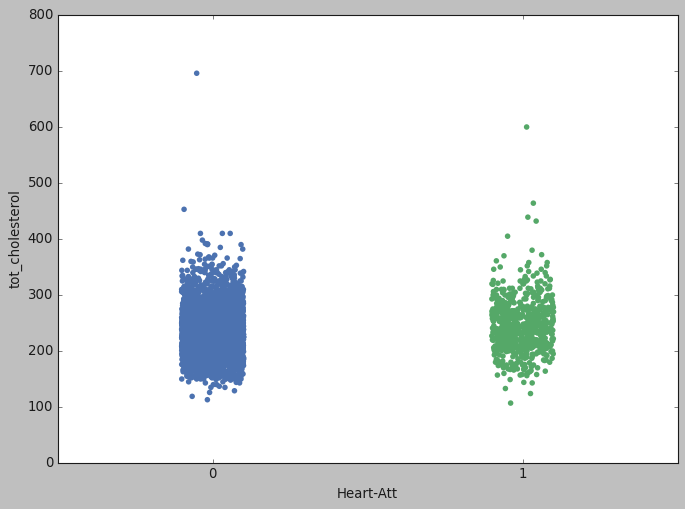

In [50]:
plt.figure(figsize=(10,7))
sns.stripplot(df['Heart-Att'], df['tot_cholesterol'], jitter=True)
# Distribution of values
plt.show()

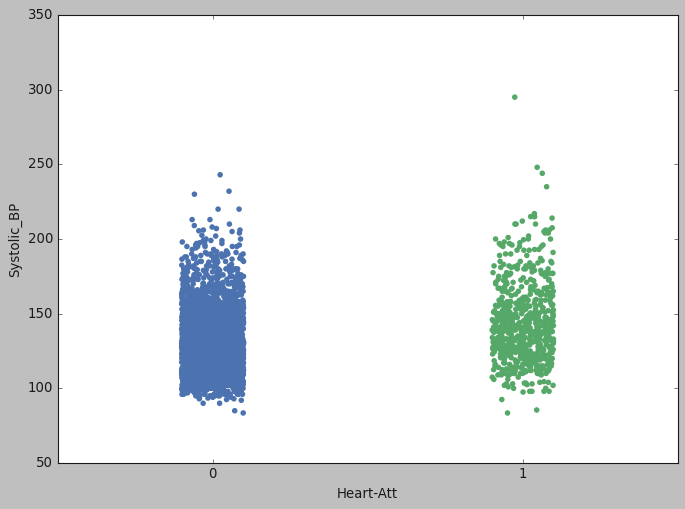

In [51]:
plt.figure(figsize=(10,7))
sns.stripplot(df['Heart-Att'], df['Systolic_BP'], jitter=True)
# Distribution of values
plt.show()

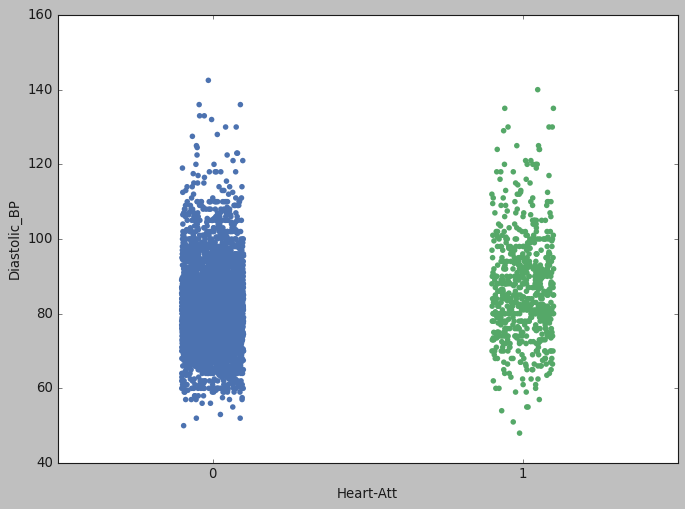

In [52]:
plt.figure(figsize=(10,7))
sns.stripplot(df['Heart-Att'], df['Diastolic_BP'], jitter=True)
# Distribution of values
plt.show()

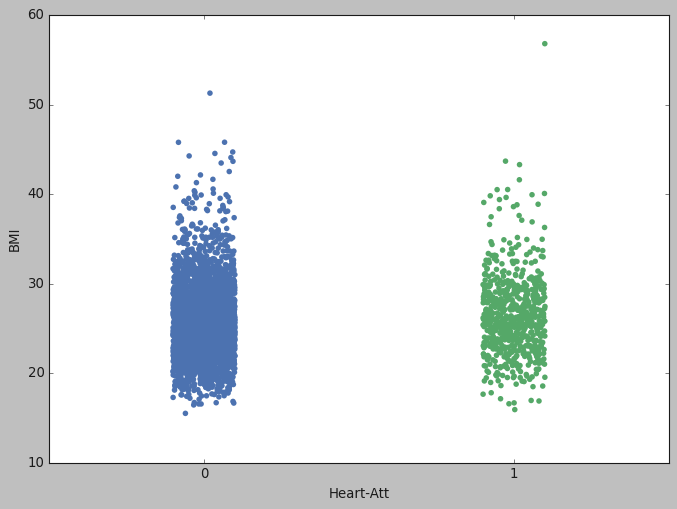

In [53]:
plt.figure(figsize=(10,7))
sns.stripplot(df['Heart-Att'], df['BMI'], jitter=True)
# Distribution of values
plt.show()

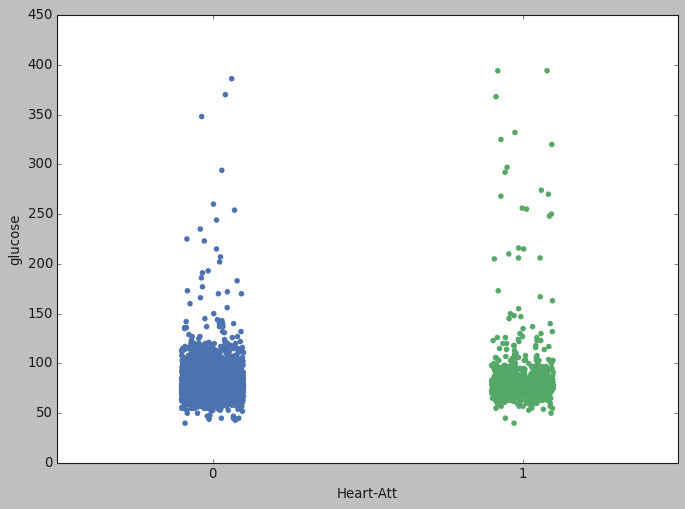

In [54]:
plt.figure(figsize=(10,7))
sns.stripplot(df['Heart-Att'], df['glucose'], jitter=True)
# Distribution of values
plt.show()

# Multivariate analysis
# Correlation Plot

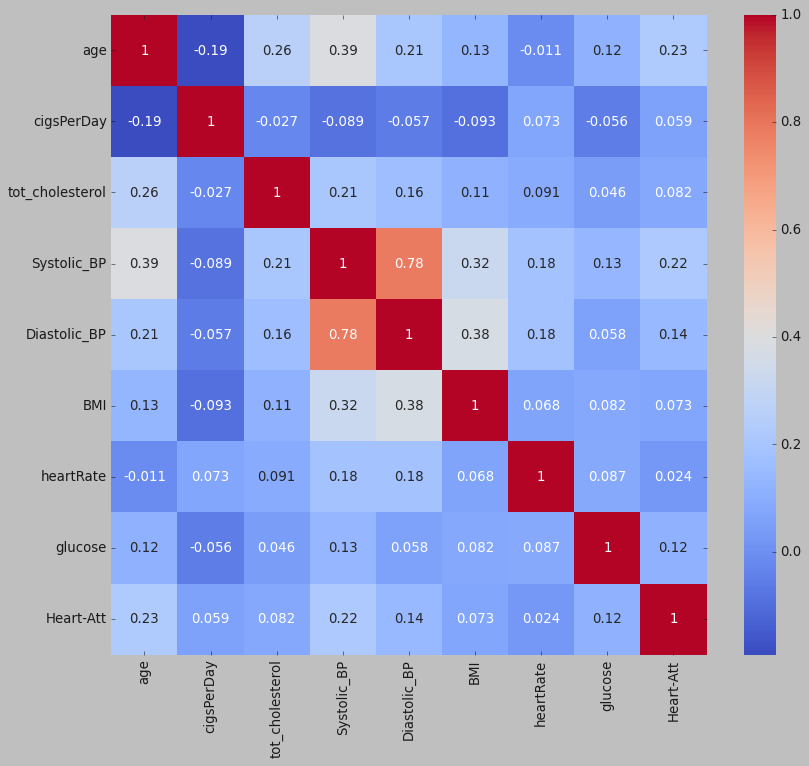

In [55]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Higher values, higher chances of heart attack basis the above correlation part

<Figure size 960x800 with 0 Axes>

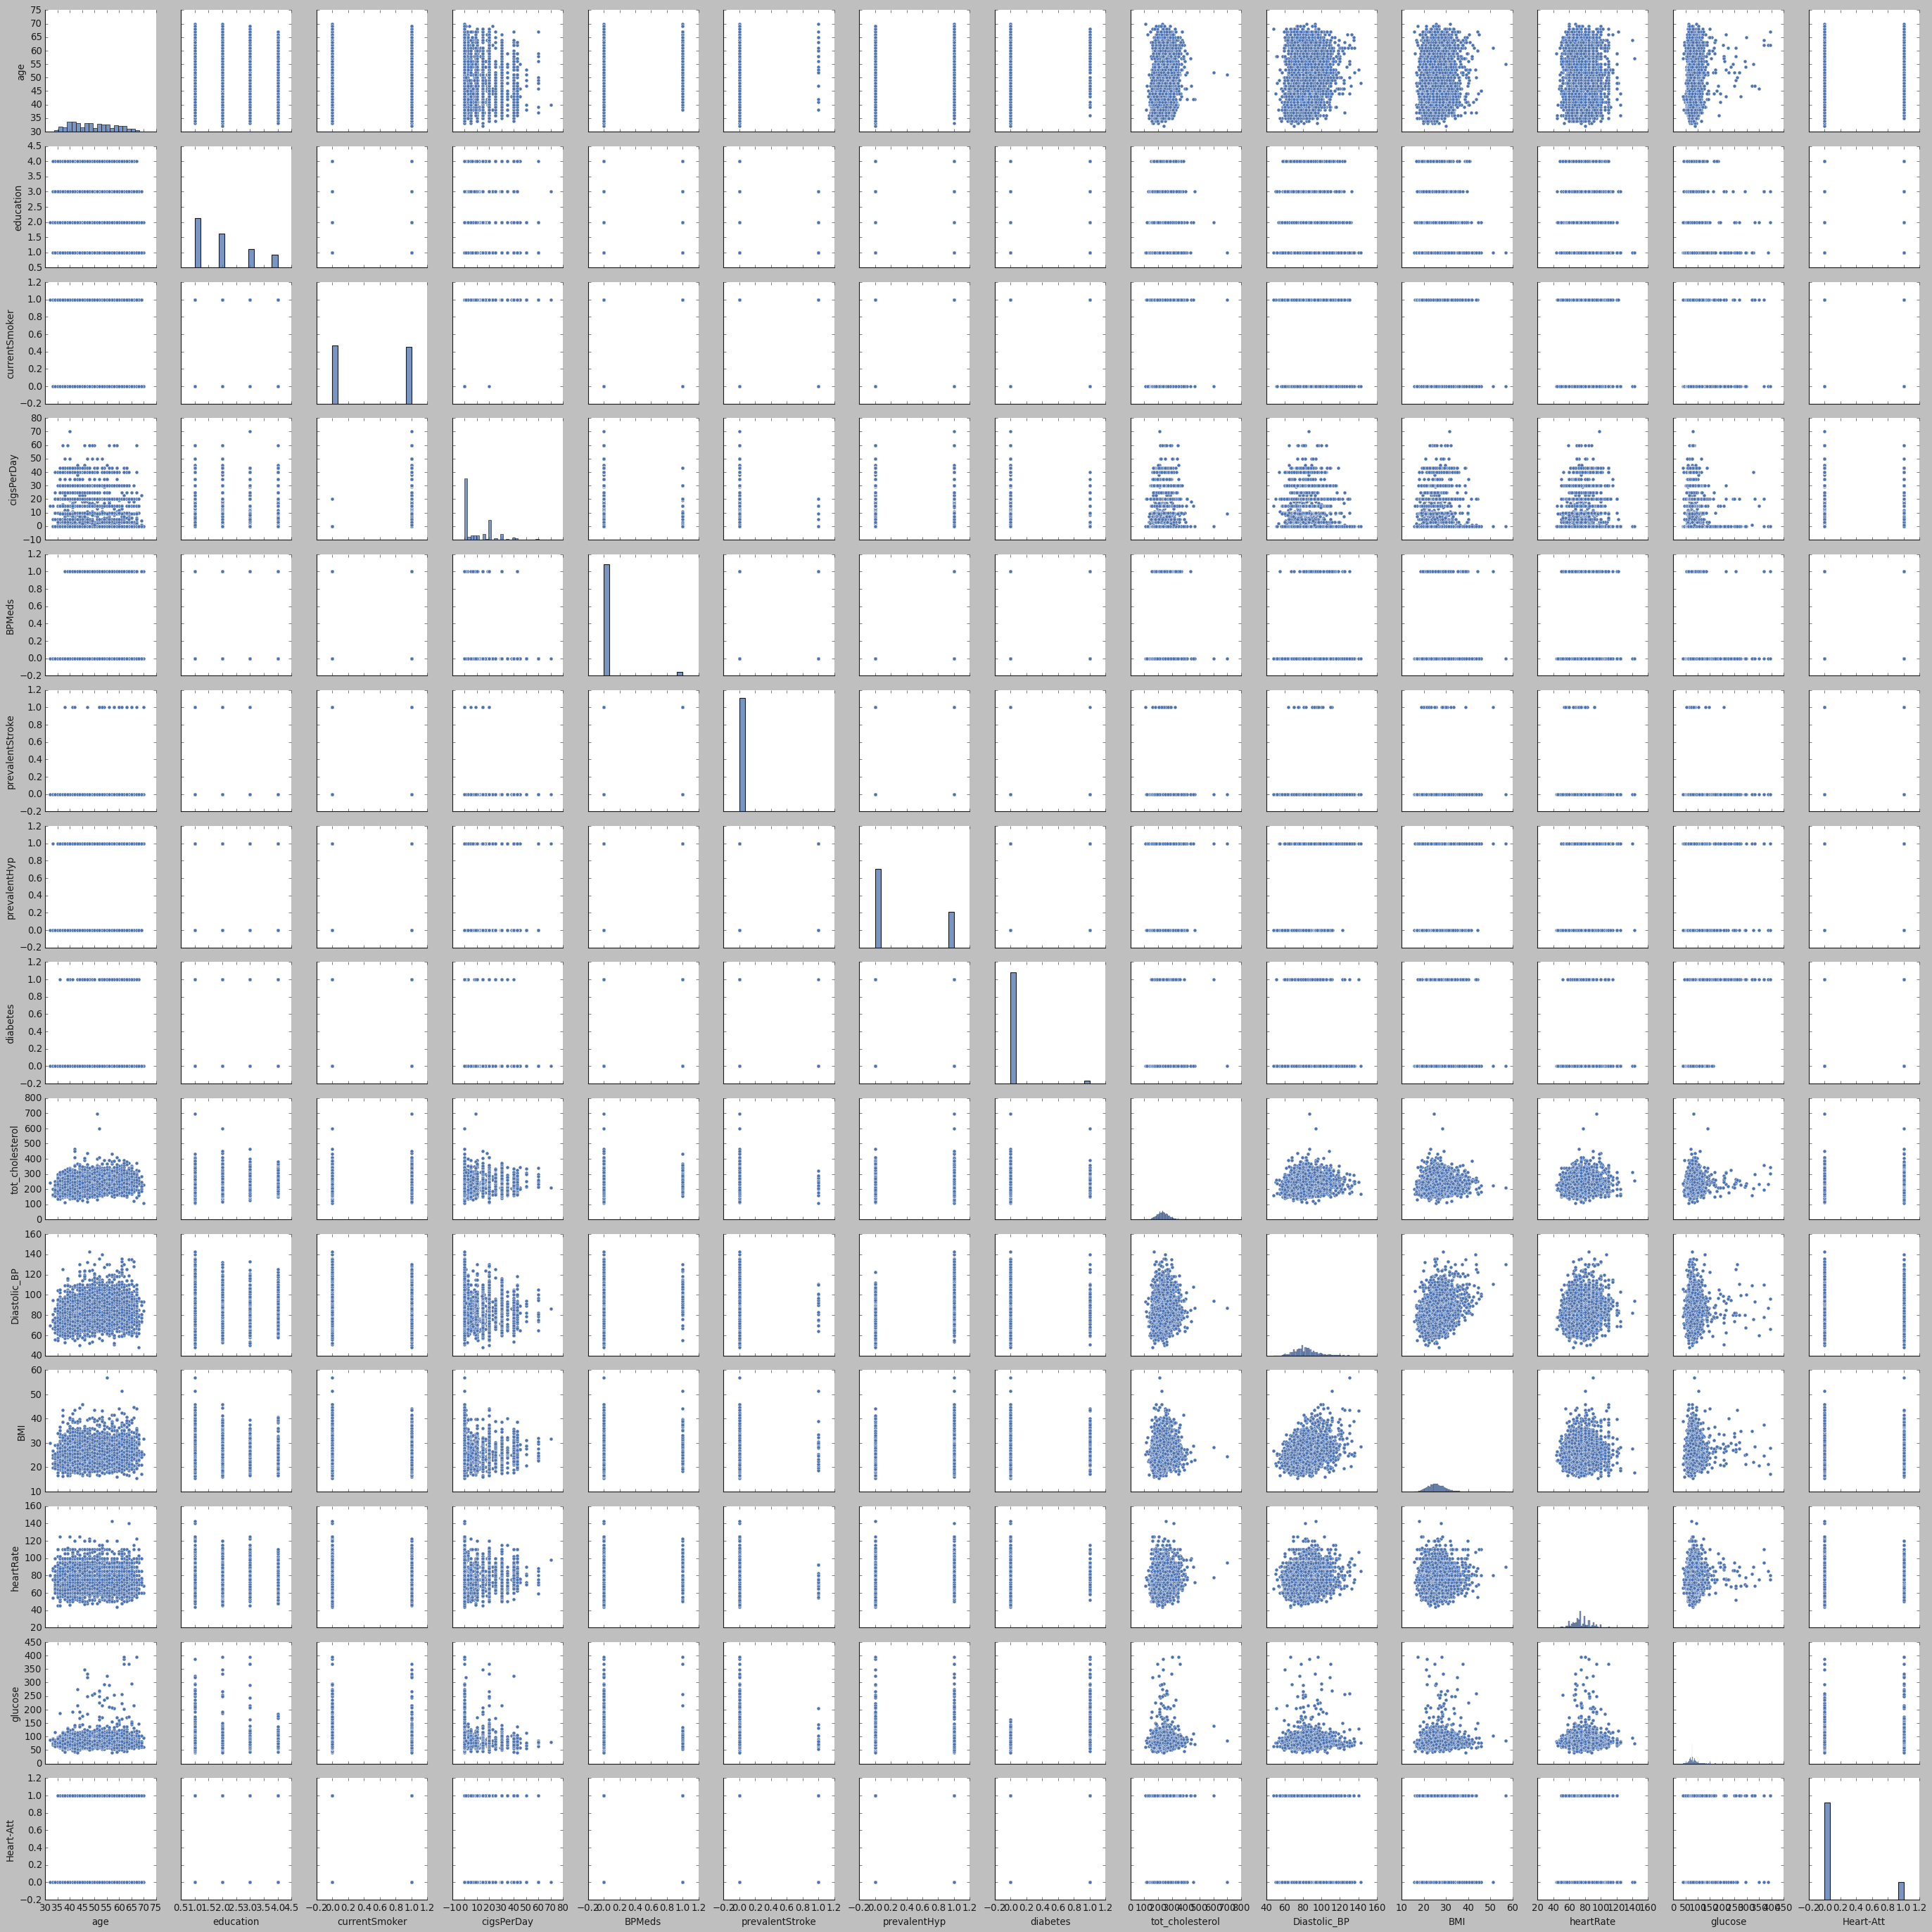

In [56]:
# Pair plot to get clarity with all features
df.drop(['Systolic_BP'], axis=1, inplace=True)
plt.figure(figsize=(12,10))
sns.pairplot(df)
plt.show()

#### Encoding required as there are categorical features given on the dataset

In [57]:
print(cat)

['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


#### Drop first is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to Multicollinearity. This is done to ensure that we don't land in to dummy trap. So, please consider as a mandatory steps whenever we use OHE

In [58]:
df = pd.get_dummies(df, columns=cat, drop_first=True)

In [59]:
df.head()

,age,cigsPerDay,tot_cholesterol,Diastolic_BP,BMI,heartRate,glucose,Heart-Att,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,39.0,0.0,195.0,70.0,26.97,80.0,77.0,0,1,0,0,1,0,0,0,0,0
1,46.0,0.0,250.0,81.0,28.73,95.0,76.0,0,0,1,0,0,0,0,0,0,0
2,48.0,20.0,245.0,80.0,25.34,75.0,70.0,0,1,0,0,0,1,0,0,0,0
3,61.0,30.0,225.0,95.0,28.58,65.0,103.0,1,0,0,1,0,1,0,0,1,0
4,46.0,23.0,285.0,84.0,23.10,85.0,85.0,0,0,0,1,0,1,0,0,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4240 non-null   float64
 1   cigsPerDay           4240 non-null   float64
 2   tot_cholesterol      4240 non-null   float64
 3   Diastolic_BP         4240 non-null   float64
 4   BMI                  4240 non-null   float64
 5   heartRate            4240 non-null   float64
 6   glucose              4240 non-null   float64
 7   Heart-Att            4240 non-null   int64  
 8   Gender_Male          4240 non-null   uint8  
 9   education_2.0        4240 non-null   uint8  
 10  education_3.0        4240 non-null   uint8  
 11  education_4.0        4240 non-null   uint8  
 12  currentSmoker_1.0    4240 non-null   uint8  
 13  BPMeds_1.0           4240 non-null   uint8  
 14  prevalentStroke_1.0  4240 non-null   uint8  
 15  prevalentHyp_1.0     4240 non-null   u

# Outlier Checks

In [61]:
df.columns

Index(['age', 'cigsPerDay', 'tot_cholesterol', 'Diastolic_BP', 'BMI',
       'heartRate', 'glucose', 'Heart-Att', 'Gender_Male', 'education_2.0',
       'education_3.0', 'education_4.0', 'currentSmoker_1.0', 'BPMeds_1.0',
       'prevalentStroke_1.0', 'prevalentHyp_1.0', 'diabetes_1.0'],
      dtype='object')

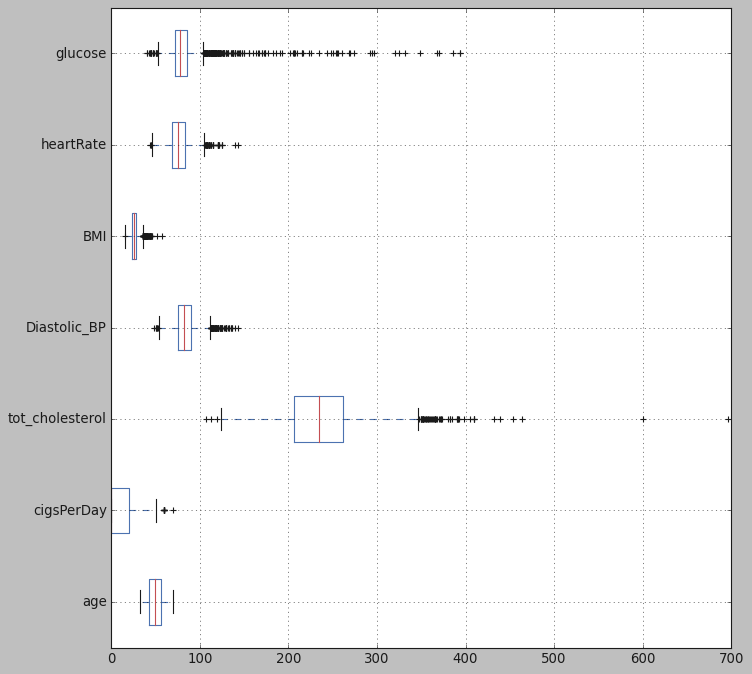

In [62]:
# construct boxplot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:,:7].boxplot(vert=0)
plt.show()

#### Except for age, all other continuous variables have possible outliers

# Outlier treatement - Capping method

In [63]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [65]:
for column in df.iloc[:,1:7].columns:
    lr, ur = remove_outlier(df[column])
    df[column] = np.where(df[column]>ur, ur, df[column])
    df[column] = np.where(df[column]<lr, lr, df[column])

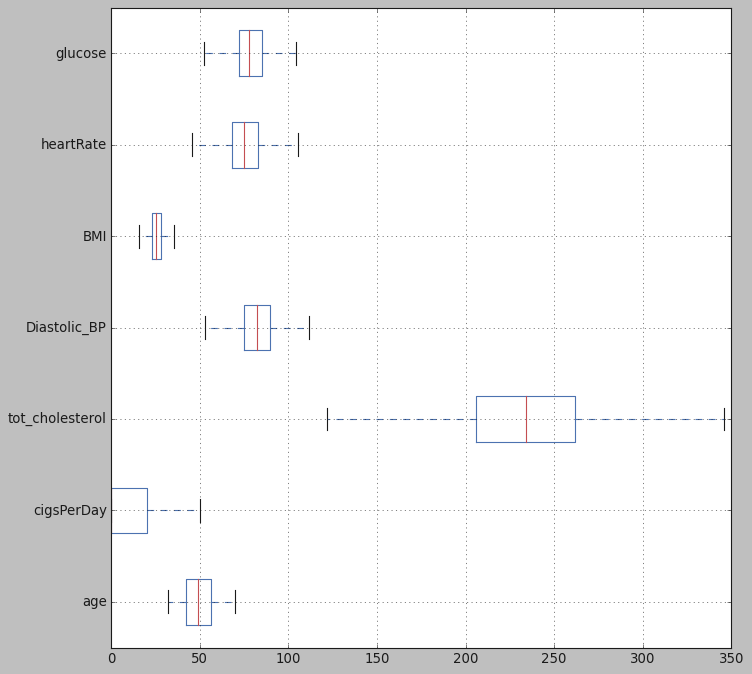

In [66]:
plt.figure(figsize=(10,10))
df.iloc[:,:7].boxplot(vert=0)
plt.show()

# Scaling the variables as continous variables have different weightage using Min-Max technique

In [67]:
print(num)

['age', 'cigsPerDay', 'tot_cholesterol', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


In [71]:
df.columns

Index(['age', 'cigsPerDay', 'tot_cholesterol', 'Diastolic_BP', 'BMI',
       'heartRate', 'glucose', 'Heart-Att', 'Gender_Male', 'education_2.0',
       'education_3.0', 'education_4.0', 'currentSmoker_1.0', 'BPMeds_1.0',
       'prevalentStroke_1.0', 'prevalentHyp_1.0', 'diabetes_1.0'],
      dtype='object')

In [72]:
num1 = ['age', 'cigsPerDay', 'tot_cholesterol', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose']
### removing the correlated variable which was dropped earlier and target variable

In [73]:
df[num1] = df[num1].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [74]:
df.head()

,age,cigsPerDay,tot_cholesterol,Diastolic_BP,BMI,heartRate,glucose,Heart-Att,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,0.184211,0.00,0.325893,0.289530,0.571862,0.575000,0.471154,0,1,0,0,1,0,0,0,0,0
1,0.368421,0.00,0.571429,0.477564,0.660931,0.825000,0.451923,0,0,1,0,0,0,0,0,0,0
2,0.421053,0.40,0.549107,0.460470,0.489372,0.491667,0.336538,0,1,0,0,0,1,0,0,0,0
3,0.763158,0.60,0.459821,0.716880,0.653340,0.325000,0.971154,1,0,0,1,0,1,0,0,1,0
4,0.368421,0.46,0.727679,0.528846,0.376012,0.658333,0.625000,0,0,0,1,0,1,0,0,0,0


# Split the data into Train-Test Format

In [75]:
df.columns

Index(['age', 'cigsPerDay', 'tot_cholesterol', 'Diastolic_BP', 'BMI',
       'heartRate', 'glucose', 'Heart-Att', 'Gender_Male', 'education_2.0',
       'education_3.0', 'education_4.0', 'currentSmoker_1.0', 'BPMeds_1.0',
       'prevalentStroke_1.0', 'prevalentHyp_1.0', 'diabetes_1.0'],
      dtype='object')

In [76]:
# Copy all the predictor variables into x dataframe
x = df.drop('Heart-Att', axis=1)

# Copy target into the y dataframe
y = df['Heart-Att']

In [77]:
x.head()

,age,cigsPerDay,tot_cholesterol,Diastolic_BP,BMI,heartRate,glucose,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,0.184211,0.00,0.325893,0.289530,0.571862,0.575000,0.471154,1,0,0,1,0,0,0,0,0
1,0.368421,0.00,0.571429,0.477564,0.660931,0.825000,0.451923,0,1,0,0,0,0,0,0,0
2,0.421053,0.40,0.549107,0.460470,0.489372,0.491667,0.336538,1,0,0,0,1,0,0,0,0
3,0.763158,0.60,0.459821,0.716880,0.653340,0.325000,0.971154,0,0,1,0,1,0,0,1,0
4,0.368421,0.46,0.727679,0.528846,0.376012,0.658333,0.625000,0,0,1,0,1,0,0,0,0


In [78]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heart-Att, dtype: int64

In [79]:
# Check imbalance dataset and handle it
y.value_counts()

0    3596
1     644
Name: Heart-Att, dtype: int64

In [81]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)

In [82]:
y_ros.value_counts()

0    3596
1    3596
Name: Heart-Att, dtype: int64

# EDA, Data Cleaning and Data Preprocessing part completed

In [83]:
# Split x_ros and y_ros into training and test set in 75:25 ratio

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.25, random_state=1)

# Model Building - Ensemble Learning

##### Ada Boost
##### Gradient Boosting
##### XGBoost
##### RandomForest
##### Bagging


In [85]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=1)
ada_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [87]:
# Performance Matrix on train dataset
y_train_predict = ada_model.predict(x_train)
model_score = ada_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.6916944753429737
[[1823  871]
 [ 792 1908]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      2694
           1       0.69      0.71      0.70      2700

    accuracy                           0.69      5394
   macro avg       0.69      0.69      0.69      5394
weighted avg       0.69      0.69      0.69      5394



In [88]:
# Performance Matrix on test dataset
y_test_predict = ada_model.predict(x_test)
model_score = ada_model.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.6668520578420467
[[596 306]
 [293 603]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       902
           1       0.66      0.67      0.67       896

    accuracy                           0.67      1798
   macro avg       0.67      0.67      0.67      1798
weighted avg       0.67      0.67      0.67      1798



# Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [90]:
# Performance Matrix on train dataset
y_train_predict = gbcl.predict(x_train)
model_score = gbcl.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.7423062662217278
[[1897  797]
 [ 593 2107]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      2694
           1       0.73      0.78      0.75      2700

    accuracy                           0.74      5394
   macro avg       0.74      0.74      0.74      5394
weighted avg       0.74      0.74      0.74      5394



In [91]:
# Performance Matrix on test dataset
y_test_predict = gbcl.predict(x_test)
model_score = gbcl.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.6957730812013349
[[599 303]
 [244 652]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       902
           1       0.68      0.73      0.70       896

    accuracy                           0.70      1798
   macro avg       0.70      0.70      0.70      1798
weighted avg       0.70      0.70      0.70      1798



# RandomForest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [95]:
# Performance Matrix on train dataset
y_train_predict = rf_model.predict(x_train)
model_score = rf_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

1.0
[[2694    0]
 [   0 2700]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2700

    accuracy                           1.00      5394
   macro avg       1.00      1.00      1.00      5394
weighted avg       1.00      1.00      1.00      5394



# K-Fold method

In [99]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(rf_model, x_train, y_train, cv=10)
print("Training Accuracy", training.mean())

Training Accuracy 0.9540228818800248


In [96]:
# Performance Matrix on test dataset
y_test_predict = rf_model.predict(x_test)
model_score = rf_model.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.967741935483871
[[849  53]
 [  5 891]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       902
           1       0.94      0.99      0.97       896

    accuracy                           0.97      1798
   macro avg       0.97      0.97      0.97      1798
weighted avg       0.97      0.97      0.97      1798



# Bagging Classifier

In [101]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train, y_train)

BaggingClassifier(random_state=1)

In [102]:
# Performance Matrix on train dataset
y_train_predict = bagging.predict(x_train)
model_score = bagging.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.9994438264738599
[[2693    1]
 [   2 2698]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2700

    accuracy                           1.00      5394
   macro avg       1.00      1.00      1.00      5394
weighted avg       1.00      1.00      1.00      5394



In [103]:
# Performance Matrix on test dataset
y_test_predict = bagging.predict(x_test)
model_score = bagging.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.9360400444938821
[[796 106]
 [  9 887]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       902
           1       0.89      0.99      0.94       896

    accuracy                           0.94      1798
   macro avg       0.94      0.94      0.94      1798
weighted avg       0.94      0.94      0.94      1798



# XGBoost Classifier

In [108]:
# !pip install xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1, ...)

In [109]:
# Performance Matrix on train dataset
y_train_predict = xgb_model.predict(x_train)
model_score = xgb_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.996662958843159
[[2684   10]
 [   8 2692]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2700

    accuracy                           1.00      5394
   macro avg       1.00      1.00      1.00      5394
weighted avg       1.00      1.00      1.00      5394



In [110]:
# Performance Matrix on test dataset
y_test_predict = xgb_model.predict(x_test)
model_score = xgb_model.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.9204671857619577
[[774 128]
 [ 15 881]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       902
           1       0.87      0.98      0.92       896

    accuracy                           0.92      1798
   macro avg       0.93      0.92      0.92      1798
weighted avg       0.93      0.92      0.92      1798



# Visualizing Performance with ROC

In [111]:
from sklearn.metrics import roc_curve, auc
def plot_roc(model, x_test, y_test):
    probabilities = model.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1] )
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2F' % roc_auc)
    plt.legend(loc="lower right")
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.show()

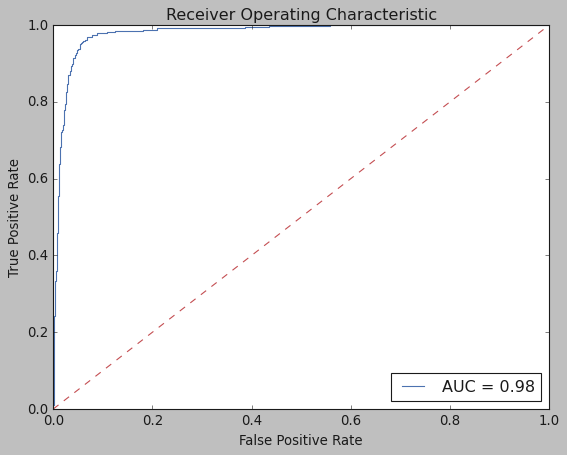

In [112]:
plot_roc(xgb_model, x_test, y_test)

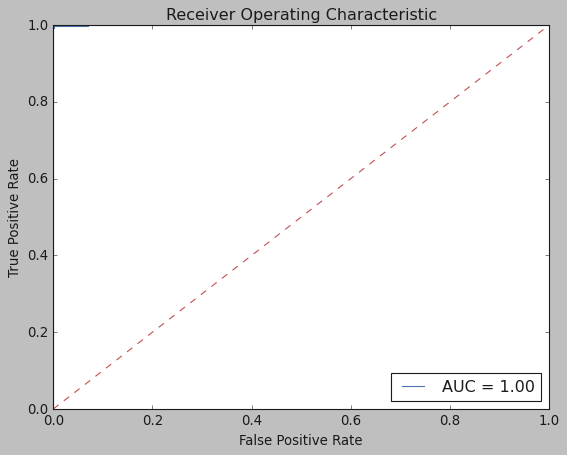

In [116]:
plot_roc(xgb_model, x_train, y_train)

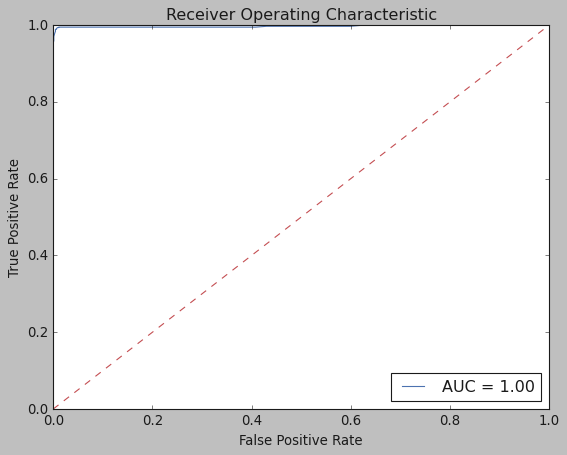

In [115]:
plot_roc(rf_model, x_test, y_test)

# Naive Bayes Model

In [118]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [119]:
# Performance Matrix on train dataset
y_train_predict = nb_model.predict(x_train)
model_score = nb_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.6021505376344086
[[2419  275]
 [1871  829]]
              precision    recall  f1-score   support

           0       0.56      0.90      0.69      2694
           1       0.75      0.31      0.44      2700

    accuracy                           0.60      5394
   macro avg       0.66      0.60      0.56      5394
weighted avg       0.66      0.60      0.56      5394



In [120]:
# Performance Matrix on test dataset
y_test_predict = nb_model.predict(x_test)
model_score = nb_model.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.6023359288097887
[[804  98]
 [617 279]]
              precision    recall  f1-score   support

           0       0.57      0.89      0.69       902
           1       0.74      0.31      0.44       896

    accuracy                           0.60      1798
   macro avg       0.65      0.60      0.57      1798
weighted avg       0.65      0.60      0.57      1798



# LDA - Linear Discriminant Analysis

In [122]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [123]:
# Performance Matrix on train dataset
y_train_predict = LDA_model.predict(x_train)
model_score = LDA_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.6787170930663701
[[1770  924]
 [ 809 1891]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      2694
           1       0.67      0.70      0.69      2700

    accuracy                           0.68      5394
   macro avg       0.68      0.68      0.68      5394
weighted avg       0.68      0.68      0.68      5394



In [124]:
# Performance Matrix on test dataset
y_test_predict = LDA_model.predict(x_test)
model_score = LDA_model.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.6701890989988877
[[599 303]
 [290 606]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       902
           1       0.67      0.68      0.67       896

    accuracy                           0.67      1798
   macro avg       0.67      0.67      0.67      1798
weighted avg       0.67      0.67      0.67      1798



# KNN Model

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7,weights='distance')
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [133]:
# Performance Matrix on train dataset
y_train_predict = knn_model.predict(x_train)
model_score = knn_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

1.0
[[2694    0]
 [   0 2700]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2700

    accuracy                           1.00      5394
   macro avg       1.00      1.00      1.00      5394
weighted avg       1.00      1.00      1.00      5394



In [134]:
# Performance Matrix on test dataset
y_test_predict = knn_model.predict(x_test)
model_score = knn_model.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.818131256952169
[[580 322]
 [  5 891]]
              precision    recall  f1-score   support

           0       0.99      0.64      0.78       902
           1       0.73      0.99      0.84       896

    accuracy                           0.82      1798
   macro avg       0.86      0.82      0.81      1798
weighted avg       0.86      0.82      0.81      1798



In [135]:
train_knn = cross_val_score(knn_model, x_train, y_train, cv=15)
test_knn = cross_val_score(knn_model, x_test, y_test,cv =15)
print(train_knn.max())
print(test_knn.max())

0.8384401114206128
0.8235294117647058


In [131]:
train_knn 

array([0.76388889, 0.74166667, 0.76666667, 0.78333333, 0.77222222,
       0.76111111, 0.73888889, 0.80277778, 0.75833333, 0.77158774,
       0.7270195 , 0.78830084, 0.78551532, 0.74094708, 0.77158774])

# Decision Tree Classifier

In [137]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [138]:
# Performance Matrix on train dataset
y_train_predict = dt_model.predict(x_train)
model_score = dt_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

1.0
[[2694    0]
 [   0 2700]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2700

    accuracy                           1.00      5394
   macro avg       1.00      1.00      1.00      5394
weighted avg       1.00      1.00      1.00      5394



In [139]:
# Performance Matrix on test dataset
y_test_predict = dt_model.predict(x_test)
model_score = dt_model.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.9098998887652948
[[743 159]
 [  3 893]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       902
           1       0.85      1.00      0.92       896

    accuracy                           0.91      1798
   macro avg       0.92      0.91      0.91      1798
weighted avg       0.92      0.91      0.91      1798



# LogisticRegression

In [142]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [143]:
# Performance Matrix on train dataset
y_train_predict = logit.predict(x_train)
model_score = logit.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.6772339636633297
[[1781  913]
 [ 828 1872]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      2694
           1       0.67      0.69      0.68      2700

    accuracy                           0.68      5394
   macro avg       0.68      0.68      0.68      5394
weighted avg       0.68      0.68      0.68      5394



In [144]:
# Performance Matrix on test dataset
y_test_predict = logit.predict(x_test)
model_score = logit.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.6685205784204672
[[603 299]
 [297 599]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       902
           1       0.67      0.67      0.67       896

    accuracy                           0.67      1798
   macro avg       0.67      0.67      0.67      1798
weighted avg       0.67      0.67      0.67      1798



# Support Vector Classifier

In [152]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train, y_train)

SVC()

In [153]:
# Performance Matrix on train dataset
y_train_predict = svm_model.predict(x_train)
model_score = svm_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.7161661104931405
[[1870  824]
 [ 707 1993]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      2694
           1       0.71      0.74      0.72      2700

    accuracy                           0.72      5394
   macro avg       0.72      0.72      0.72      5394
weighted avg       0.72      0.72      0.72      5394



In [151]:
# Performance Matrix on test dataset
y_test_predict = svm_model.predict(x_test)
model_score = svm_model.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.6646273637374861
[[570 332]
 [271 625]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       902
           1       0.65      0.70      0.67       896

    accuracy                           0.66      1798
   macro avg       0.67      0.66      0.66      1798
weighted avg       0.67      0.66      0.66      1798

